In [37]:
import pandas as pd
import numpy as np

In [38]:
df_train = pd.read_csv('/kaggle/input/gammafest-water-feasability/no_map_imputed_mf5iter.csv')
df_train

,DC216,DC220,DC142a,DC024,DC025,DC205,DC206,DC207,DC208,DC209,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC201
0,1.0,80.0,60.0,11,2,16.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,1
1,2.0,44.0,70.0,11,2,31.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,1
2,2.0,35.0,75.0,11,2,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,1
3,3.0,79.0,85.0,11,2,12.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1,11.0,1
4,2.0,37.0,65.0,11,2,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35965,1.0,21.0,9.0,94,1,17.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1,21.0,1
35966,1.0,41.0,12.0,94,1,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,1
35967,2.0,52.0,48.0,94,1,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1,11.0,1
35968,2.0,58.0,39.0,94,1,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,1


In [39]:
target = 'DC201'
NUMERICAL_DATA = ['DC216', 'DC220', 'DC142a']
CATEGORICAL_DATA = [column for column in df_train.columns if column != target and column not in NUMERICAL_DATA]

COLUMN_CATEGORICAL_INDEX = []

for column in CATEGORICAL_DATA:
    COLUMN_CATEGORICAL_INDEX.append(df_train.columns.get_loc(column))

In [40]:
df_test = pd.read_csv('/kaggle/input/gammafest-water-feasability/test.csv')
df_test_ids = df_test.pop('id')
df_test

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
0,35,2,17,1,0,1,0,1,1,0,...,0,0,1,1,1,1,1,3,21,52
1,35,1,12,1,1,1,1,0,1,0,...,0,0,1,1,0,0,1,2,11,18
2,74,2,12,1,0,1,1,1,1,0,...,0,0,1,0,0,1,4,5,11,78
3,72,1,12,1,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,11,20
4,76,2,12,1,0,1,0,0,1,0,...,0,0,1,1,1,1,1,3,11,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,65,2,12,1,0,1,0,0,1,1,...,0,0,1,0,0,0,0,4,11,70
11986,61,2,12,1,0,1,1,0,1,0,...,0,1,1,1,1,0,0,4,11,120
11987,74,1,12,1,1,1,1,0,1,0,...,0,0,1,1,0,0,1,2,11,72
11988,74,2,31,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,1,51,9


In [41]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()

# train set
numerical_df_train = df_train[NUMERICAL_DATA].astype(float).copy()
categorical_df_train = df_train[CATEGORICAL_DATA].astype('category').copy()

# normalization
scaler.fit(numerical_df_train)
numerical_df_train = scaler.transform(numerical_df_train)
numerical_df_train = pd.DataFrame(numerical_df_train, columns=NUMERICAL_DATA)


# test set
numerical_df_test = df_test[NUMERICAL_DATA].astype(float).copy()
categorical_df_test = df_test[CATEGORICAL_DATA].astype('category').copy()

# normalization
numerical_df_test = scaler.transform(numerical_df_test)
numerical_df_test = pd.DataFrame(numerical_df_test, columns=NUMERICAL_DATA)

# Create an instance of the OneHotEncoder
encoder = ce.OneHotEncoder(cols=CATEGORICAL_DATA, use_cat_names=True)

# Fit the encoder on the training data
encoder.fit(categorical_df_train)

one_hot_df_train = encoder.transform(categorical_df_train)
one_hot_df_test = encoder.transform(categorical_df_test)

merged_df_train = pd.concat([numerical_df_train, one_hot_df_train, df_train[target]], axis=1)
merged_df_test = pd.concat([numerical_df_test, one_hot_df_test], axis=1)

# merged_df_train

In [42]:
merged_df_train

,DC216,DC220,DC142a,DC024_11.0,DC024_12.0,DC024_13.0,DC024_14.0,DC024_15.0,DC024_16.0,DC024_17.0,...,DC109_12.0,DC109_31.0,DC109_11.0,DC109_41.0,DC109_32.0,DC109_21.0,DC109_51.0,DC109_33.0,DC109_96.0,DC201
0,-1.197714,2.298908,-0.248722,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,-0.292958,-0.326370,-0.139020,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,-0.292958,-0.982689,-0.084169,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.611798,2.225983,0.025533,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,-0.292958,-0.836840,-0.193871,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35965,-1.197714,-2.003630,-0.808201,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
35966,-1.197714,-0.545143,-0.775291,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
35967,-0.292958,0.257025,-0.380364,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
35968,-0.292958,0.694572,-0.479096,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [43]:
merged_df_test

,DC216,DC220,DC142a,DC024_11.0,DC024_12.0,DC024_13.0,DC024_14.0,DC024_15.0,DC024_16.0,DC024_17.0,...,DC270a_3.0,DC109_12.0,DC109_31.0,DC109_11.0,DC109_41.0,DC109_32.0,DC109_21.0,DC109_51.0,DC109_33.0,DC109_96.0
0,-1.197714,-1.420235,-0.336483,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,-1.197714,-0.472218,-0.709470,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.292958,-0.180521,-0.051258,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-1.197714,-0.180521,-0.687529,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.611798,-0.107596,0.464341,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,-0.292958,-0.909764,-0.139020,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11986,-0.292958,-0.399294,0.409490,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11987,-0.292958,-0.253445,-0.117079,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11988,-1.197714,-2.076554,-0.808201,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
one_hot_df_train

,DC024_11.0,DC024_12.0,DC024_13.0,DC024_14.0,DC024_15.0,DC024_16.0,DC024_17.0,DC024_18.0,DC024_19.0,DC024_21.0,...,DC270a_3.0,DC109_12.0,DC109_31.0,DC109_11.0,DC109_41.0,DC109_32.0,DC109_21.0,DC109_51.0,DC109_33.0,DC109_96.0
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
35966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
35967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
35968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
one_hot_df_test

,DC024_11.0,DC024_12.0,DC024_13.0,DC024_14.0,DC024_15.0,DC024_16.0,DC024_17.0,DC024_18.0,DC024_19.0,DC024_21.0,...,DC270a_3.0,DC109_12.0,DC109_31.0,DC109_11.0,DC109_41.0,DC109_32.0,DC109_21.0,DC109_51.0,DC109_33.0,DC109_96.0
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
a = np.sort(one_hot_df_train.columns)
b = np.sort(one_hot_df_test.columns)
diff = np.setdiff1d(b,a)
diff

array([], dtype=object)

In [47]:
# for column in a:
#     print(column)
#     a = one_hot_df_train[column].unique()
#     b = one_hot_df_test[column].unique()
#     print(a, '|', b)
#     non_unique = np.setdiff1d(b,a)
#     print(non_unique)
#     print('---')

In [48]:
trainds = merged_df_train.copy()
testds = merged_df_test.copy()

y = trainds.pop(target)
X = trainds

X_test = testds

In [57]:
from sklearn.model_selection import train_test_split

train_size = 0.8
RANDOM_SEED = 69

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = train_size,
                                                  random_state = RANDOM_SEED)

# We will keep the shuffle = True since our dataset has not any time dependency.

In [66]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

RANDOM_SEED = 42

xgb = XGBClassifier(tree_method='gpu_hist', gpu_id=0,
                    objective='binary:logistic', 
#                     early_stopping_rounds=10, 
                    verbose_eval=True, random_state = RANDOM_SEED)

# xgb.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

In [67]:
from datetime import datetime

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

folds = 5
param_comb = 10

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = RANDOM_SEED)

In [69]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [5, 7, 9],
        'gamma': [0.1, 0.0005, 0.001],
        'subsample': [0.6, 0.8, 1],
        'colsample_bytree': [1.0],
        'max_depth': [12],
        'learning_rate': [0.1, 0.2],
        'reg_alpha': [0.1],
        'reg_lambda': [1],
        'eval_metric': ['error'],
        'n_estimators': [100, 500, 1000]
        }

"""
{'colsample_bytree': 1.0, 'eval_metric': 'error', 'gamma': 0.0005, 
'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 7, 'n_estimators': 100, 
'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}
"""

grid = GridSearchCV(estimator=xgb, param_grid=params,
                    scoring='f1_micro', n_jobs=-1,
                    cv=skf, verbose=3)

start_time = timer(None) # timing starts from this point for "start_time" variable
# grid.fit(X_train_fit, y_train_fit)
grid.fit(X_train, y_train)
# grid.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[11:38:21] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose_eval" } are not used.


 Time taken: 0 hours 0 minutes and 48.77 seconds.


In [70]:
print('\n All results:')
print(grid.cv_results_)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)


 All results:
{'mean_fit_time': array([1.89255304, 5.47078934, 9.97960663]), 'std_fit_time': array([0.04932075, 0.138795  , 2.01690664]), 'mean_score_time': array([0.09739513, 0.2813302 , 0.4783936 ]), 'std_score_time': array([0.00228927, 0.00596595, 0.03734196]), 'param_colsample_bytree': masked_array(data=[1.0, 1.0, 1.0],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_eval_metric': masked_array(data=['error', 'error', 'error'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.0005, 0.0005, 0.0005],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[12, 12, 12],
             mask=[False, False, False],
       fill_value='?',
         

In [71]:
# print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb.predict(X_val),y_val):.4f}")
# print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_search.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_search.predict(X_val),y_val):.4f}")
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(grid.best_estimator_.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(grid.best_estimator_.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9444
Metrics test:
	Accuracy score: 0.9151


In [72]:
from sklearn.metrics import classification_report, f1_score

# predictions = xgb.predict(X_val)
# predictions = random_search.predict(X_val)
predictions = grid.best_estimator_.predict(X_val)
print(classification_report(y_val,predictions, digits=4))
print(f1_score(y_val, predictions))

              precision    recall  f1-score   support

           0     0.6399    0.3050    0.4131       705
           1     0.9286    0.9814    0.9542      6489

    accuracy                         0.9151      7194
   macro avg     0.7842    0.6432    0.6836      7194
weighted avg     0.9003    0.9151    0.9012      7194

0.9542219225294073


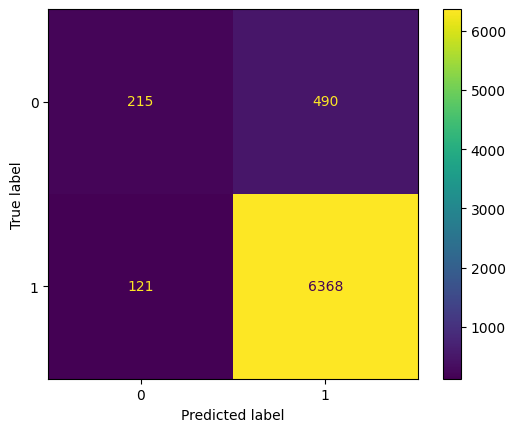

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [74]:
# use custom threshold
from sklearn.metrics import log_loss, precision_recall_curve, f1_score

def choose_best_threshold(probas, target):
    ''' iterates over thresholds to choose the one with the highest f1 score '''
    results = dict()
    precision, recall, thresholds = precision_recall_curve(target, probas)
    f1_scores = 2 * recall * precision / (recall + precision)
    best_f1_ind = np.argmax(f1_scores)
    results['best_threshold'] = thresholds[best_f1_ind]
    results['validation_precision']      = precision[best_f1_ind]
    results['validation_recall']         = recall[best_f1_ind]
    results['validation_f1_score']  = np.max(f1_scores)
    return results 

prob_predictions = grid.best_estimator_.predict_proba(X_val)[:, 1]
threshold = choose_best_threshold(prob_predictions, y_val)
print(threshold)

P_prod = grid.best_estimator_.predict_proba(X_val)[:, 1] > threshold['best_threshold']
# P_prod = grid.best_estimator_.predict_proba(X_val)[:, 1] > 0.5
print(classification_report(y_val,P_prod, digits=4))
print(f1_score(y_val, P_prod))

{'best_threshold': 0.43858317, 'validation_precision': 0.9242620590352771, 'validation_recall': 0.9892125134843581, 'validation_f1_score': 0.955634956081584}
              precision    recall  f1-score   support

           0     0.7160    0.2539    0.3749       705
           1     0.9243    0.9891    0.9556      6489

    accuracy                         0.9170      7194
   macro avg     0.8201    0.6215    0.6652      7194
weighted avg     0.9038    0.9170    0.8987      7194

0.955557209856324


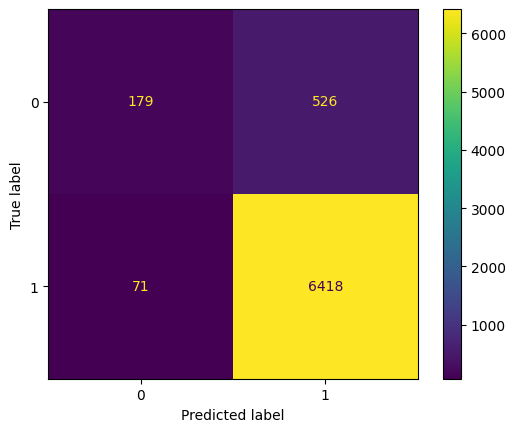

In [75]:
cm = confusion_matrix(y_val, P_prod)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [76]:
from sklearn.metrics import f1_score

# Make probability predictions on the validation data
y_prob = grid.best_estimator_.predict_proba(X_val)[:, 1]

# Compute the F1 score for different threshold values
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = [f1_score(y_val, y_prob > t) for t in thresholds]

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = np.max(f1_scores)

print(f'Best threshold: {best_threshold}')
print(f'Best F1 score: {best_f1_score}')

Best threshold: 0.43
Best F1 score: 0.9554348634774198


In [77]:
# Make binary predictions using the best decision threshold
y_pred = y_prob > best_threshold

print(classification_report(y_val,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7190    0.2468    0.3675       705
           1     0.9236    0.9895    0.9554      6489

    accuracy                         0.9167      7194
   macro avg     0.8213    0.6182    0.6615      7194
weighted avg     0.9036    0.9167    0.8978      7194



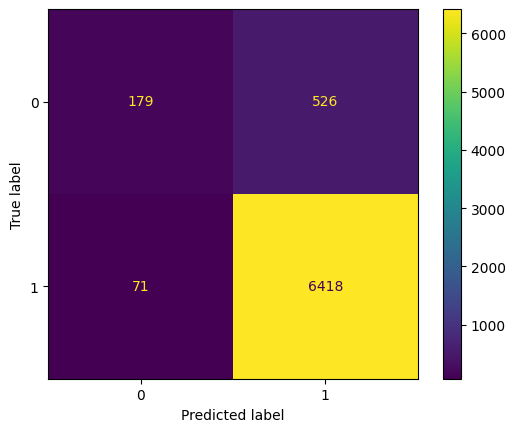

[11:34:45] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

[CV 1/5] END colsample_bytree=1.0, eval_metric=error, gamma=0.0005, learning_rate=0.1, max_depth=12, min_child_weight=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8;, score=nan total time=   2.1s
[11:34:46] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

[CV 4/5] END colsample_bytree=1.0, eval_metric=error, gamma=0.0005, learning_rate=0.1, max_depth=12, min_child_weight=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8;, score=nan total time=   0.7s
[11:34:47] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

[CV 5/5] END colsample_bytree=1.0, eval_metric=error, gamma=0.0005, learning_rate=0.1, max_depth=12, min_child_weight=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8;, score=nan total time=   1.0s
[11:34:47] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

[

In [78]:
cm = confusion_matrix(y_val, P_prod)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Test set

In [79]:
X_test

,DC216,DC220,DC142a,DC024_11.0,DC024_12.0,DC024_13.0,DC024_14.0,DC024_15.0,DC024_16.0,DC024_17.0,...,DC270a_3.0,DC109_12.0,DC109_31.0,DC109_11.0,DC109_41.0,DC109_32.0,DC109_21.0,DC109_51.0,DC109_33.0,DC109_96.0
0,-1.197714,-1.420235,-0.336483,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,-1.197714,-0.472218,-0.709470,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.292958,-0.180521,-0.051258,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-1.197714,-0.180521,-0.687529,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.611798,-0.107596,0.464341,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,-0.292958,-0.909764,-0.139020,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11986,-0.292958,-0.399294,0.409490,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11987,-0.292958,-0.253445,-0.117079,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11988,-1.197714,-2.076554,-0.808201,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
df_test_ids

0        26718
1        26802
2        41302
3        38698
4        44257
         ...  
11985    36943
11986    33415
11987    41998
11988    41567
11989    45296
Name: id, Length: 11990, dtype: int64

In [81]:
P_prod_submit = grid.best_estimator_.predict_proba(X_test)[:, 1] > best_threshold
# P_prod_submit = grid.best_estimator_.predict(X_test_submit)
P_prod_submit

array([ True,  True,  True, ...,  True,  True,  True])

In [82]:
result = []
for prediction in P_prod_submit:
    result.append('Layak Minum' if prediction==1 else 'Tidak Layak Minum')
pd.DataFrame(result).value_counts()

Layak Minum          11573
Tidak Layak Minum      417
dtype: int64

In [84]:
finish_pd = pd.DataFrame({'id':df_test_ids.values, 'DC201':result})
finish_pd

,id,DC201
0,26718,Layak Minum
1,26802,Layak Minum
2,41302,Layak Minum
3,38698,Layak Minum
4,44257,Layak Minum
...,...,...
11985,36943,Layak Minum
11986,33415,Layak Minum
11987,41998,Layak Minum
11988,41567,Layak Minum


In [85]:
finish_pd['DC201'].value_counts()

Layak Minum          11573
Tidak Layak Minum      417
Name: DC201, dtype: int64

In [86]:
finish_pd.to_csv('result_xgboost_hypertuneold_standardizatino_onehot_nosmote_custom_threshold.csv', index=False)

In [ ]:
check_pd = pd.read_csv('result_xgboost_hypertuneold_standardizatino_onehot_nosmote_custom_threshold.csv')
check_pd

In [ ]:
check_pd['DC201'].value_counts()